# Exercise 1

## 1.1

In [1]:
abstract type AbstractWalker end

## 1.2

In [2]:
abstract type Abstract2DWalker <: AbstractWalker end

## 1.3

In [3]:
struct Location 
    x::Int64
    y::Int64
end

## 1.4

In [4]:
mutable struct Walker2D <: Abstract2DWalker
    position::Location
end

## 1.5

In [5]:
methods(Walker2D)

# 2 methods for type constructor:
[1] Walker2D(position::Location) in Main at In[4]:2
[2] Walker2D(position) in Main at In[4]:2

In [6]:
Walker2D(Location(0,0))

Walker2D(Location(0, 0))

## 1.6

In [7]:
Walker2D(x,y) = Walker2D(Location(x,y))

Walker2D

## 1.7

In [8]:
function make_tuple(l::Location)
    return (l.x, l.y)
end

make_tuple (generic function with 1 method)

## 1.8

In [9]:
pos(walker::Abstract2DWalker) = walker.position

pos (generic function with 1 method)

## 1.9

In [10]:
function set_pos!(w::Abstract2DWalker, l::Location)
    w.position = l
end

set_pos! (generic function with 1 method)

## 1.10

In [11]:
function jump()
    neighbors = (Location(0,1), Location(1,0), Location(-1,0), Location(0,-1))
    return rand(neighbors)
end

jump (generic function with 1 method)

## 1.11

In [12]:
function jump!(w::Abstract2DWalker)
    curr_x = pos(w).x
    curr_y = pos(w).y
    new = jump()
    new_x = curr_x+new.x
    new_y = curr_y+new.y
    set_pos!(w, Location(new_x, new_y)) #set new position to random one returned by jump
end

jump! (generic function with 1 method)

## 1.12

In [13]:
function trajectory(w::Abstract2DWalker, N)
    traj = [pos(w)] #initialize trajectory with initial position of w
    
    for i in 1:N-1
        jump!(w)
        push!(traj, pos(w))
    end
    
    return make_tuple.(traj)
end

trajectory (generic function with 1 method)

## 1.13

In [14]:
using Plots

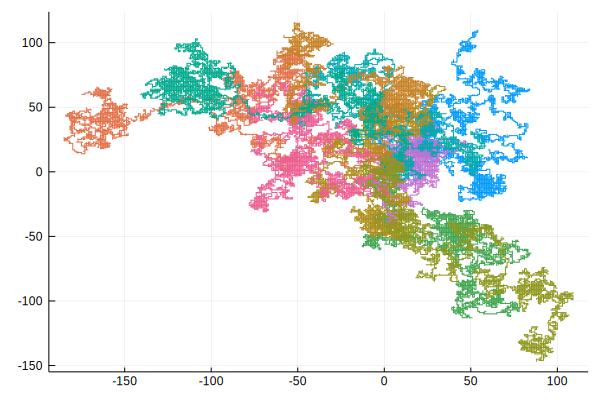

In [15]:
N = 10000
p = plot(leg = false)

for i in 1:10
    w = Walker2D(0,0)
    traj = trajectory(w, N)
    plot!(traj)
end
p

# Exercise 2

## 2.1

In [16]:
@enum InfectionStatus S I R

In [17]:
mutable struct Agent <: Abstract2DWalker
    position::Location
    state::InfectionStatus
end

## 2.2

In [18]:
function jump!(a::Agent, L)
    curr_x = pos(a).x
    curr_y = pos(a).y

    new = jump()

    new_x = curr_x+new.x
    new_y = curr_y+new.y
    if (abs(new_x) < L) && (abs(new_y) < L) #make sure that the new position is within the box
        set_pos!(a, Location(new_x, new_y)) #set new position to random one returned by jump
    end
    return pos(a)
end

jump! (generic function with 2 methods)

In [19]:
a = Agent(Location(0,0), S)
pos(a).y

0

In [20]:
jump!(a, 20)

Location(-1, 0)

## 2.3

In [21]:
function trajectory(w::Abstract2DWalker, N, L)
    traj = [pos(w)] #initialize trajectory with initial position of w
    
    for i in 1:N-1
        push!(traj, jump!(w, L))
        #push!(traj, pos(w))
    end
    
    return make_tuple.(traj)
end

trajectory (generic function with 2 methods)

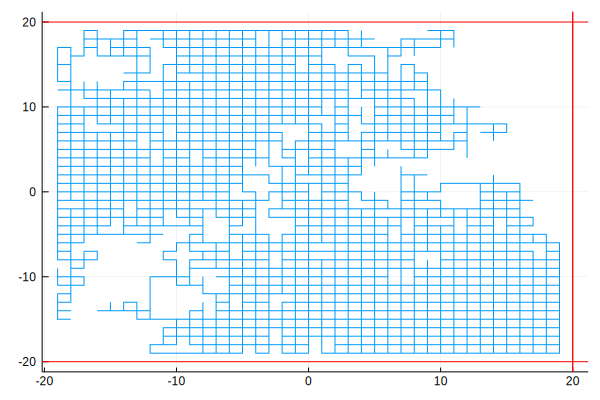

In [22]:
a = Agent(Location(0,0), S)
L = 20
traj = trajectory(a, 10000, L)

pl = plot(traj, leg = false)
hline!([20], c=:red)
hline!([-20], c=:red)
vline!([20], c=:red)
vline!([20], c=:red)

# Exercise 3

## 3.1

In [23]:
function initialize(L, N)
    agents = Agent[] #vector of N agents
    locations = [] #vector of tuples representing locations already occupied
    
    for i in 1:N #create each agent
        x = rand(-L:L) #generate possible location within box
        y = rand(-L:L)
        
        while (x,y) in locations #check to see if this location is already occupied
            x = rand(-L:L)
            y = rand(-L:L)
        end
        
        push!(locations, (x,y)) #add location of new agent to list of ones already occupied
        push!(agents, Agent(Location(x,y), i==1 ? I : S)) #add new agent to vector
    end
    
    return agents
end

initialize (generic function with 1 method)

## 3.2

In [24]:
agents = initialize(10, 20)

20-element Array{Agent,1}:
 Agent(Location(2, -2), I)
 Agent(Location(-10, 10), S)
 Agent(Location(-5, 0), S)
 Agent(Location(0, -9), S)
 Agent(Location(7, 10), S)
 Agent(Location(-7, -4), S)
 Agent(Location(6, -4), S)
 Agent(Location(8, -9), S)
 Agent(Location(-4, 10), S)
 Agent(Location(-4, 2), S)
 Agent(Location(3, -9), S)
 Agent(Location(4, -3), S)
 Agent(Location(1, 8), S)
 Agent(Location(3, 7), S)
 Agent(Location(2, 0), S)
 Agent(Location(-8, -3), S)
 Agent(Location(-2, 1), S)
 Agent(Location(-10, -10), S)
 Agent(Location(-4, 7), S)
 Agent(Location(-6, 4), S)

## 3.3

In [25]:
function visualize_agents(agents, L)
    s = scatter(leg = false, xlims = (-L, L), ylims = (-L, L))
    colors = Dict(S => "blue", I => "red", R => "green")
    
    for agent in agents
        scatter!(make_tuple(pos(agent)), c = colors[agent.state])
    end
    return s
end

visualize_agents (generic function with 1 method)

## 3.4

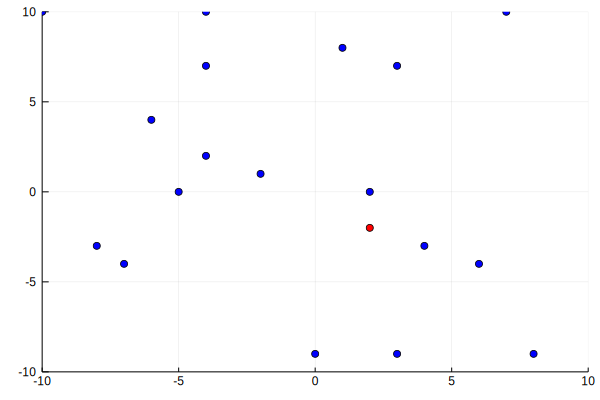

In [26]:
visualize_agents(agents, 10)

# Exercise 4

## 4.1

In [27]:
function step!(agents, L, pI, pR)
    i = rand(1:length(agents)) #pick a random agent i
    
    #possible new position for i
    nextStep = jump()
    curr_x = pos(agents[i]).x
    curr_y = pos(agents[i]).y
    new_x = curr_x+nextStep.x
    new_y = curr_y+nextStep.y
    while (abs(new_x) > L) || (abs(new_y) > L)
        nextStep = jump()
        new_x = curr_x+nextStep.x
        new_y = curr_y+nextStep.y
    end
    
    newLoc = Location(new_x, new_y)
    
    for j in 1:length(agents) 
        if (newLoc == pos(agents[j])) && (i != j) #see if any other agents currently occupy the proposed new location
            if agents[i].state == I #see if i is infected
                infected = rand() < pI #i infects j with probability pI
                if (agents[j].state == S) && infected #see if j is susceptible and gets infected
                    agents[j].state = I
                end
                
                recovered = rand() < pR #i recovers with probability pR
                if recovered 
                    agents[i].state = R 
                end
                return #exit if i infects j
            end
        end
    end
    
    set_pos!(agents[i], newLoc) #if newLoc not occupied, move i there
    
    recovered = rand() < pR #i recovers with probability pR
    if recovered && (agents[i].state == I)
        agents[i].state = R 
    end
end         

step! (generic function with 1 method)

## 4.2

In [28]:
agents = initialize(10, 20)
for i in 1:5
    step!(agents, 10, 0.5, 0.01)
end

## 4.3

In [29]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12264663222477341444\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5357695414423615945\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12264663222477341444\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [30]:
agents = initialize(3, 20)

@manipulate for i in 1:1000
    step!(agents, 3, 0.5, 0.01)
    visualize_agents(agents, 5)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
500, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000013a96ad10, Task (runnable) @0x000000013a96ad10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\"

## 4.4

In [31]:
function sweep!(agents, L, pI, pR, N)
    for i in 1:N
        step!(agents, L, pI, pR)
    end
end

sweep! (generic function with 1 method)

## 4.5

In [32]:
function dynamics!(agents, L, pI, pR, N, numSweeps)
    for i in 1:numSweeps
        sweep!(agents, L, pI, pR, N)
    end
end

dynamics! (generic function with 1 method)

In [33]:
a = initialize(10,20)

20-element Array{Agent,1}:
 Agent(Location(-6, 6), I)
 Agent(Location(-6, -9), S)
 Agent(Location(-3, 2), S)
 Agent(Location(0, -5), S)
 Agent(Location(-4, -1), S)
 Agent(Location(-1, 3), S)
 Agent(Location(10, 10), S)
 Agent(Location(4, -2), S)
 Agent(Location(-8, -4), S)
 Agent(Location(-3, 6), S)
 Agent(Location(7, -10), S)
 Agent(Location(5, -5), S)
 Agent(Location(-7, -3), S)
 Agent(Location(10, 4), S)
 Agent(Location(6, 9), S)
 Agent(Location(9, -1), S)
 Agent(Location(8, -9), S)
 Agent(Location(-7, -6), S)
 Agent(Location(5, 9), S)
 Agent(Location(2, -3), S)

In [34]:
dynamics!(a, 10, 0.8, 0.01, 50, 50)
stateOfSystem = deepcopy(a)

20-element Array{Agent,1}:
 Agent(Location(-1, 10), R)
 Agent(Location(2, -10), S)
 Agent(Location(-1, 6), S)
 Agent(Location(-6, 8), S)
 Agent(Location(-7, 7), S)
 Agent(Location(1, 0), S)
 Agent(Location(5, 10), S)
 Agent(Location(9, -6), S)
 Agent(Location(-5, -2), S)
 Agent(Location(9, 10), S)
 Agent(Location(8, -9), S)
 Agent(Location(5, -1), S)
 Agent(Location(-3, 6), S)
 Agent(Location(3, 2), S)
 Agent(Location(8, 2), S)
 Agent(Location(6, 9), S)
 Agent(Location(5, -9), S)
 Agent(Location(-7, -6), S)
 Agent(Location(1, 8), S)
 Agent(Location(-9, 2), S)

## 4.6

In [35]:
L = 20
N = 100
pI = 0.99
pR = 0.01
agents = initialize(L, N)
Is = []
Ss = []
Rs = []

@manipulate for i in 1:100
    dynamics!(agents, L, pI, pR, N, i)
    push!(Is, count(num -> num==I, [agents[i].state for i in 1:N]))
    push!(Ss, count(num -> num==S, [agents[i].state for i in 1:N]))
    push!(Rs, count(num -> num==R, [agents[i].state for i in 1:N]))
    p1 = visualize_agents(agents, L)
    p2 = plot(Ss, label="Susceptible", xlabel = "number of sweeps", ylabel = "mumber of people"); plot!(Is, label="Infected"); plot!(Rs, label="Recovered")
    hbox(p1, p2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011d475f90, Task (runnable) @0x000000011d475f90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\

## 4.7

In [36]:
L = 20
N = 100
pI = 0.8
pR = 0.01
agents = initialize(L, N)
Is = []
Ss = []
Rs = []


@manipulate for i in 1:100
    dynamics!(agents, L, pI, pR, N, i)
    push!(Is, count(num -> num==I, [agents[i].state for i in 1:N]))
    push!(Ss, count(num -> num==S, [agents[i].state for i in 1:N]))
    push!(Rs, count(num -> num==R, [agents[i].state for i in 1:N]))
    p1 = visualize_agents(agents, L)
    p2 = plot(Ss, label="Susceptible", xlabel = "number of sweeps", ylabel = "mumber of people"); plot!(Is, label="Infected"); plot!(Rs, label="Recovered")
    hbox(p1, p2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001208e61d0, Task (runnable) @0x00000001208e61d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\

## 4.8

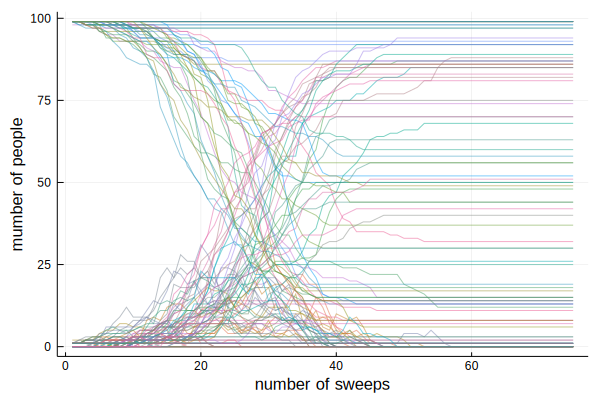

In [37]:
L = 20
N = 100
pI = 0.8
pR = 0.01

p = plot(xlabel = "number of sweeps", ylabel = "mumber of people", leg = false)

for i in 1:50
    agents = initialize(L, N)
    Is = []
    Ss = []
    Rs = []
    for i in 1:75
        dynamics!(agents, L, pI, pR, N, i)
        push!(Is, count(num -> num==I, [agents[i].state for i in 1:N]))
        push!(Ss, count(num -> num==S, [agents[i].state for i in 1:N]))
        push!(Rs, count(num -> num==R, [agents[i].state for i in 1:N]))
    end
    plot!(Ss, alpha = 0.5)
    plot!(Is, alpha = 0.5)
    plot!(Rs, alpha = 0.5)
end
p

## 4.9

In [38]:
using Statistics

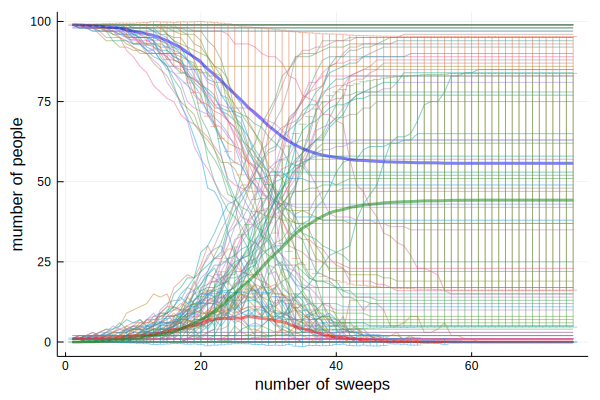

In [39]:
L = 20
N = 100
pI = 0.9
pR = 0.01

p = plot(xlabel = "number of sweeps", ylabel = "mumber of people", leg = false)

all_Is = []
all_Ss = []
all_Rs = []

for i in 1:50
    agents = initialize(L, N)
    Is = []
    Ss = []
    Rs = []
    for i in 1:75
        dynamics!(agents, L, pI, pR, N, i)
        push!(Is, count(num -> num==I, [agents[i].state for i in 1:N]))
        push!(Ss, count(num -> num==S, [agents[i].state for i in 1:N]))
        push!(Rs, count(num -> num==R, [agents[i].state for i in 1:N]))
    end
    push!(all_Is, Is)
    push!(all_Ss, Ss)
    push!(all_Rs, Rs)
    
    plot!(Ss, alpha = 0.5)
    plot!(Is, alpha = 0.5)
    plot!(Rs, alpha = 0.5)
end

meanTraj_I = mean(all_Is)
meanTraj_S = mean(all_Ss)
meanTraj_R = mean(all_Rs)

stdI = std(all_Is)
stdS = std(all_Ss)
stdR = std(all_Rs)

plot!(meanTraj_I, lw = 3, linecolor=:red, yerror = stdI, alpha = 0.5, label = "infected")
plot!(meanTraj_S, lw = 3, linecolor=:blue, yerror = stdS, alpha = 0.5, label = "susceptible")
plot!(meanTraj_R, lw = 3, linecolor=:green, yerror = stdR, alpha = 0.5, label = "recovered")

p